In [1]:
# Notebook dependencies
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm_notebook as tqdm

# paper soccer library
from papersoccer_env import Board

# Drawing game via seqience of moves

In [2]:
_,img,img_game = Board.play_sequence(["T","TL","TR","R","B","L","BR","BL"])

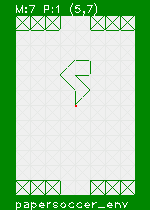

In [3]:
Image.fromarray(img)

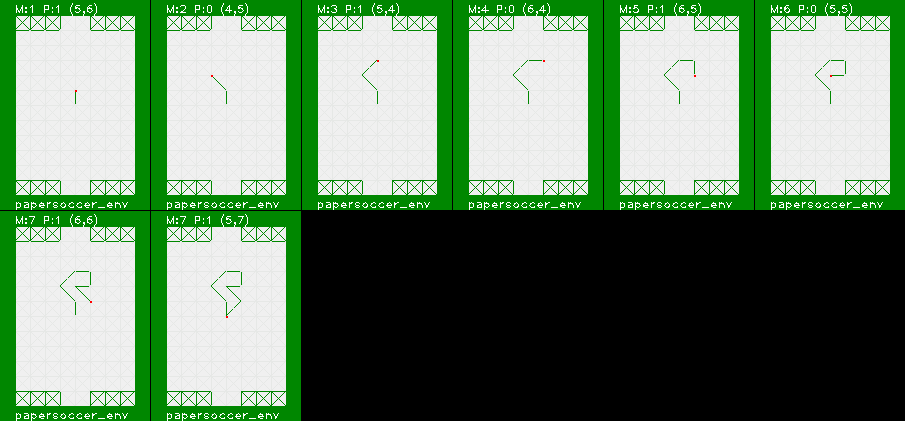

In [4]:
Image.fromarray(img_game)

# Random actor

In [5]:
class Actor():
    def __init__(self, name):
        self.name = name
        
    def get_name(self):
        return self.name
    
    def move(self, board):
        raise Exception("move(...): Not implemented")
        
class RandomActor(Actor):
    def __init__(self, name):
        super(RandomActor, self).__init__("Random_"+name)
    
    def move(self, board):
        moves_dict = board.possible_moves()
        moves = []
        for key in moves_dict:
            if moves_dict[key]:
                moves.append(key)

        index = np.random.randint(0,len(moves))
        return moves[index]
        

# Tournament

In [21]:
def play_game(playerA, playerB, max_moves):
    board = Board()
    next_player = 0
    sequence = []
    for i in range(max_moves):
        if next_player == 0:
            move = playerA.move(board)
        else:
            move = playerB.move(board)
            
        valid_move, next_player, winner = board.move(move)
        sequence.append(valid_move)
        if winner is not None:
            return i, winner, sequence       
        
    return max_moves, 0.5, sequence # draw if moves exhausted

def play_tournament(players, rounds=100, max_moves=1000):
    
    points = {p.get_name():0 for p in players}
    
    all_games = len(players)*(len(players)-1)*rounds
    progress = tqdm(total=all_games)
    
    for round in range(rounds):
        for pa, playerA in enumerate(players):
            for pb, playerB in enumerate(players):
                if pa<pb:
                    #print(f"ROUND {round}: {playerA.get_name()} vs {playerB.get_name()}")
                    _,pointsA,_ = play_game(playerA, playerB, max_moves)
                    progress.update()
                    
                    #print(f"ROUND {round}: {playerB.get_name()} vs {playerA.get_name()}")
                    _,pointsB,_ = play_game(playerB, playerA, max_moves)
                    progress.update()
                    
                    points[playerA.get_name()] += pointsA + (1-pointsB)
                    points[playerB.get_name()] += pointsB + (1-pointsA)               
    return points

# Random play

In [22]:
play_tournament([RandomActor("1"),RandomActor("2"),RandomActor("3")])

{'Random_1': 194, 'Random_2': 201, 'Random_3': 205}